# What are the Main reasons for flight delays and cancelations ?

The first thing that comes to mind when thinking about flight delays or cancelations is weather. Movies make it sound that the number one reason for flight delays and cancelation is weather or maybe secuirity concerns. This data presentation mainly focuses on whether that is true or not. 

```note this data is from years 2017,2018,and 2019. 2020 data is excluded because COVID-19 closed down flights for a couple of months ```


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data/airline_delay_causes.csv")
df = df.drop('Unnamed: 21',axis=1)
df = df.dropna()
df = df[df['year']!='2020']

C:\Users\Abdullah\Anaconda3\envs\tensorflowEnv\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


# Flight cancelation reasons and how much they contribute to the number of canceled flights

We can clearly see that a late air craft arival is the main reason why flight get canceled and not weather or secuirity problems. Infact weather contributes with only **3.3%** and secuirity cancelation contributes with only **0.2**  

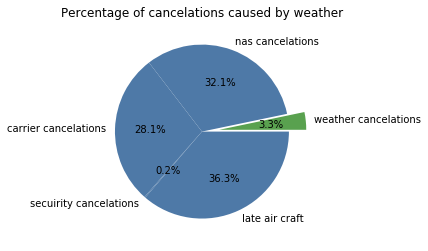

In [16]:
wethear_ct_sum= df[' weather_ct'].sum()
nas_ct_sum= df['nas_ct'].sum()
carrier_ct_sum= df['carrier_ct'].sum()
secuirity_ct_sum =df['security_ct'].sum()
late_aircraft_sum = df['late_aircraft_ct'].sum()

num_of_overall_cancelation = wethear_ct_sum+nas_ct_sum+carrier_ct_sum+secuirity_ct_sum+late_aircraft_sum

wethear_ct_sum=(wethear_ct_sum/num_of_overall_cancelation)*100
nas_ct_sum=(nas_ct_sum/num_of_overall_cancelation)*100
carrier_ct_sum=(carrier_ct_sum/num_of_overall_cancelation)*100
secuirity_ct_sum=(secuirity_ct_sum/num_of_overall_cancelation)*100
late_aircraft_sum=(late_aircraft_sum/num_of_overall_cancelation)*100


X = ['weather cancelations','nas cancelations', 'carrier cancelations', 'secuirity cancelations','late air craft']
Y = [wethear_ct_sum,nas_ct_sum,carrier_ct_sum, secuirity_ct_sum,late_aircraft_sum]
plt.pie(Y, labels=X ,colors=['#59a14f','#4e79a7','#4e79a7','#4e79a7','#4e79a7'] , explode=[0.2,0,0,0,0], autopct='%1.1f%%')
plt.title('Percentage of cancelations caused by weather')
plt.show()

# Flight delay reasons and how much they contribute to the number of delayed flights

We also see that the weather is not the main reason for delays. Weather only contributes to 7.64% of the delays. 

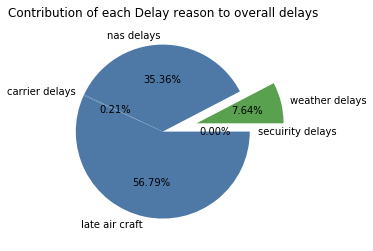

In [23]:
wethear_ct_sum= df['weather_delay'].sum()
nas_ct_sum= df['nas_delay'].sum()
carrier_ct_sum= df[' carrier_delay'].sum()
carrier_ct_sum =df['security_delay'].sum()
late_aircraft_sum = df['late_aircraft_delay'].sum()


num_of_overall_cancelation = wethear_ct_sum+nas_ct_sum+carrier_ct_sum+secuirity_ct_sum+late_aircraft_sum

wethear_ct_sum=(wethear_ct_sum/num_of_overall_cancelation)*100
nas_ct_sum=(nas_ct_sum/num_of_overall_cancelation)*100
carrier_ct_sum=(carrier_ct_sum/num_of_overall_cancelation)*100
secuirity_ct_sum=(secuirity_ct_sum/num_of_overall_cancelation)*100
late_aircraft_sum=(late_aircraft_sum/num_of_overall_cancelation)*100


X = ['weather delays' , 'nas delays','carrier delays','late air craft','secuirity delays']
Y = [wethear_ct_sum, nas_ct_sum,carrier_ct_sum,late_aircraft_sum,secuirity_ct_sum]
plt.pie(Y, labels=X ,colors=['#59a14f','#4e79a7','#4e79a7','#4e79a7','#4e79a7'], explode=[0.4,0,0,0,0],  autopct='%1.2f%%')
plt.title('Contribution of each Delay reason to overall delays')
plt.show()

# Monthly trends for weather delays

The next graph shows an intresting insight. It shows that weather delays happen in both winter and summer. It shows that hot weather can lead to flight delays. Not only rain and snow can delay a flight but also hot weather can delay flights.

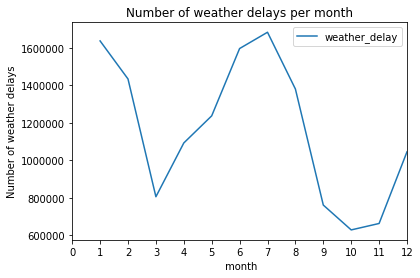

In [25]:
df_weather = df[[' month', 'weather_delay']].groupby(' month').sum().reset_index()

df_weather.plot(x=' month', y='weather_delay' )
plt.xticks(list(range(0,13,1)))
plt.ylabel("Number of weather delays")
plt.title("Number of weather delays per month")
plt.show()

# Which city have the most weather delays

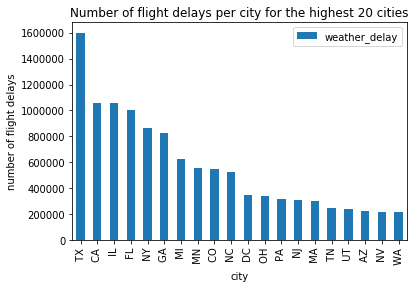

In [43]:
df['city'] = df['airport_name'].str.split(',').str[-1].str.split(':').str[0]
city_delays = df[['city','weather_delay']].groupby('city').sum().reset_index().sort_values('weather_delay',ascending=False)

city_delays = city_delays.iloc[:20]

city_delays.plot.bar(x='city',y='weather_delay')
plt.ylabel("number of flight delays")
plt.title('Number of flight delays per city for the highest 20 cities')
plt.show()

# Conclusion

* Weather contributes to a very small percentage in flight delays and cancelations. As we saw earlier It only contributed to arround 3% of the cancelations and 7% of the delays.
* Weather delays peak at both winter and summer, because hot weather make affect the airplane equipment.
* Lastly we saw the top 20 US cities that had the highest number of weather delays.

In [ ]:
# source for slide template: http://damianavila.github.io/blog/posts/hide-the-input-cells-from-your-ipython-slides.html